Авдеев Роман 317

Эксперименты на датасете MNIST

In [ ]:
! pip install sklearn
! pip install seaborn
! pip install matplotlib
! pip install scikit-image
! pip install opencv-python
! pip install cv2

In [79]:
import sys
import numpy as np
import time
import random

from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

from scipy.ndimage import shift, rotate
import skimage.io
import skimage.color
import skimage.transform
import scipy.ndimage
import cv2

In [9]:
sys.path.append(r"C:\mmp_prak\pyCharm\KNN")
from distances import euclidean_distance, cosine_distance
from cross_validation import kfold, knn_cross_val_score
from nearest_neighbors import KNNClassifier

# Подготовка данных

In [10]:
data = fetch_openml("mnist_784")

In [11]:
data.data.shape

(70000, 784)

In [12]:
data.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [13]:
data.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X = data.data.to_numpy()
y = data.target.to_numpy()
y = y.astype(int)

In [15]:
X.shape

(70000, 784)

In [16]:
y.shape

(70000,)

# Эксперименты

In [174]:
X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

## Эксперимент 1

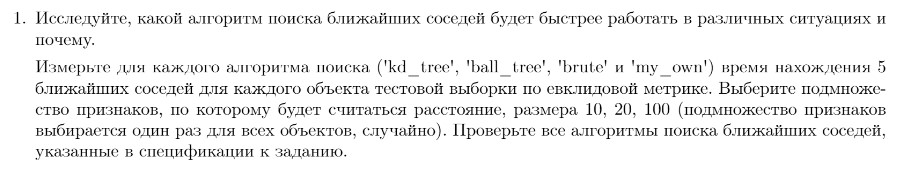

In [12]:
all_features = list(np.arange(X.shape[1]))
n_features_list = [10, 20, 100]

In [13]:
features = []
for n_features in n_features_list:
  features.append(random.sample(all_features, n_features))

### not weighted

In [14]:
time_algorithms = {}
algorithm_names = ['kd_tree', 'ball_tree', 'brute', 'my_own']
for name in algorithm_names:
  time_algorithms[name] = {}

In [15]:
time_algorithms

{'kd_tree': {}, 'ball_tree': {}, 'brute': {}, 'my_own': {}}

In [16]:
for n in range(len(features)):
  X_train_curr = X_train[:, features[n]]
  X_test_curr = X_test[:, features[n]]

  start_time = time.time()
  kd_tree_model = KNNClassifier(k=5, strategy='kd_tree', metric='euclidean', weights=False)
  kd_tree_model.fit(X_train_curr, y_train)
  y_pred = kd_tree_model.predict(X_test_curr)
  exec_time = time.time() - start_time
  time_algorithms['kd_tree'][n] = exec_time

In [17]:
for n in range(len(features)):
  X_train_curr = X_train[:, features[n]]
  X_test_curr = X_test[:, features[n]]

  start_time = time.time()
  ball_tree_model = KNNClassifier(k=5, strategy='ball_tree', metric='euclidean', weights=False)
  ball_tree_model.fit(X_train_curr, y_train)
  y_pred = ball_tree_model.predict(X_test_curr)
  exec_time = time.time() - start_time
  time_algorithms['ball_tree'][n] = exec_time

In [18]:
for n in range(len(features)):
  X_train_curr = X_train[:, features[n]]
  X_test_curr = X_test[:, features[n]]

  start_time = time.time()
  brute_model = KNNClassifier(k=5, strategy='brute', metric='euclidean', weights=False)
  brute_model.fit(X_train_curr, y_train)
  y_pred = brute_model.predict(X_test_curr)
  exec_time = time.time() - start_time
  time_algorithms['brute'][n] = exec_time

In [19]:
for n in range(len(features)):
  X_train_curr = X_train[:, features[n]]
  X_test_curr = X_test[:, features[n]]

  start_time = time.time()
  my_own_model = KNNClassifier(k=5, strategy='my_own', metric='euclidean', weights=False)
  my_own_model.fit(X_train_curr, y_train)
  y_pred = my_own_model.predict(X_test_curr)
  exec_time = time.time() - start_time
  time_algorithms['my_own'][n] = exec_time

In [20]:
time_algorithms

{'kd_tree': {0: 11.58526611328125,
  1: 10.697362184524536,
  2: 121.3156111240387},
 'ball_tree': {0: 13.050052642822266,
  1: 22.08394765853882,
  2: 119.11845517158508},
 'brute': {0: 9.053905010223389, 1: 9.164881706237793, 2: 8.644917011260986},
 'my_own': {0: 33.61450433731079, 1: 21.65421438217163, 2: 19.547762393951416}}

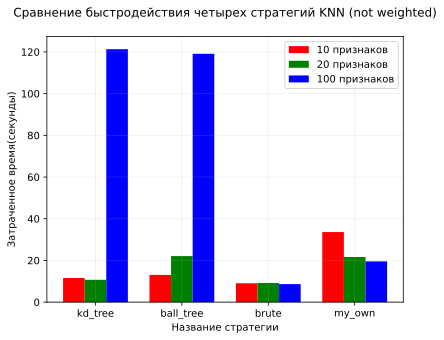

In [21]:
X = ['kd_tree', 'ball_tree', 'brute', 'my_own']
ind = np.arange(len(X))
width = 0.25

time_10_features = [time_algorithms['kd_tree'][0], time_algorithms['ball_tree'][0], 
                    time_algorithms['brute'][0], time_algorithms['my_own'][0]]
bar1 = plt.bar(ind, time_10_features, width, color = 'r')


time_20_features = [time_algorithms['kd_tree'][1], time_algorithms['ball_tree'][1], 
                    time_algorithms['brute'][1], time_algorithms['my_own'][1]]
bar2 = plt.bar(ind + width, time_20_features, width, color = 'g')


time_100_features = [time_algorithms['kd_tree'][2], time_algorithms['ball_tree'][2], 
                    time_algorithms['brute'][2], time_algorithms['my_own'][2]]
bar3 = plt.bar(ind + 2*width, time_100_features, width, color = 'b')

plt.title('Сравнение быстродействия четырех стратегий KNN (not weighted)', pad=20)
plt.xlabel("Название стратегии")
plt.ylabel('Затраченное время(секунды)')
  
plt.xticks(ind+width, X)
plt.grid(linestyle="-", alpha=.2)
plt.legend( (bar1, bar2, bar3), ('10 признаков', '20 признаков', '100 признаков') )
plt.show()

### weighted

In [22]:
time_algorithms = {}
algorithm_names = ['kd_tree', 'ball_tree', 'brute', 'my_own']
for name in algorithm_names:
  time_algorithms[name] = {}

In [23]:
time_algorithms

{'kd_tree': {}, 'ball_tree': {}, 'brute': {}, 'my_own': {}}

In [24]:
for n in range(len(features)):
  X_train_curr = X_train[:, features[n]]
  X_test_curr = X_test[:, features[n]]

  start_time = time.time()
  kd_tree_model = KNNClassifier(k=5, strategy='kd_tree', metric='euclidean', weights=True)
  kd_tree_model.fit(X_train_curr, y_train)
  y_pred = kd_tree_model.predict(X_test_curr)
  exec_time = time.time() - start_time
  time_algorithms['kd_tree'][n] = exec_time

In [25]:
for n in range(len(features)):
  X_train_curr = X_train[:, features[n]]
  X_test_curr = X_test[:, features[n]]

  start_time = time.time()
  ball_tree_model = KNNClassifier(k=5, strategy='ball_tree', metric='euclidean', weights=True)
  ball_tree_model.fit(X_train_curr, y_train)
  y_pred = ball_tree_model.predict(X_test_curr)
  exec_time = time.time() - start_time
  time_algorithms['ball_tree'][n] = exec_time

In [26]:
for n in range(len(features)):
  X_train_curr = X_train[:, features[n]]
  X_test_curr = X_test[:, features[n]]

  start_time = time.time()
  brute_model = KNNClassifier(k=5, strategy='brute', metric='euclidean', weights=True)
  brute_model.fit(X_train_curr, y_train)
  y_pred = brute_model.predict(X_test_curr)
  exec_time = time.time() - start_time
  time_algorithms['brute'][n] = exec_time

In [27]:
for n in range(len(features)):
  X_train_curr = X_train[:, features[n]]
  X_test_curr = X_test[:, features[n]]

  start_time = time.time()
  my_own_model = KNNClassifier(k=5, strategy='my_own', metric='euclidean', weights=True)
  my_own_model.fit(X_train_curr, y_train)
  y_pred = my_own_model.predict(X_test_curr)
  exec_time = time.time() - start_time
  time_algorithms['my_own'][n] = exec_time

In [28]:
time_algorithms

{'kd_tree': {0: 11.278347969055176,
  1: 10.333799600601196,
  2: 107.39130711555481},
 'ball_tree': {0: 12.33509111404419,
  1: 19.694335460662842,
  2: 113.76510834693909},
 'brute': {0: 9.754913806915283, 1: 9.876583337783813, 2: 9.675126075744629},
 'my_own': {0: 28.533156394958496, 1: 24.20422101020813, 2: 21.75256872177124}}

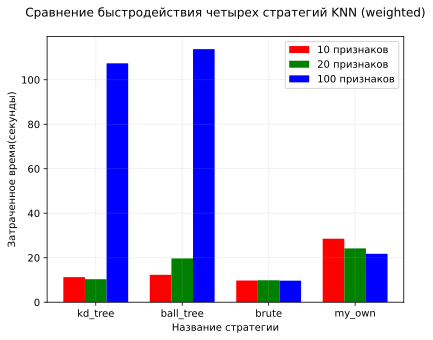

In [29]:
X = ['kd_tree', 'ball_tree', 'brute', 'my_own']
ind = np.arange(len(X))
width = 0.25

time_10_features = [time_algorithms['kd_tree'][0], time_algorithms['ball_tree'][0], 
                    time_algorithms['brute'][0], time_algorithms['my_own'][0]]
bar1 = plt.bar(ind, time_10_features, width, color = 'r')


time_20_features = [time_algorithms['kd_tree'][1], time_algorithms['ball_tree'][1], 
                    time_algorithms['brute'][1], time_algorithms['my_own'][1]]
bar2 = plt.bar(ind + width, time_20_features, width, color = 'g')


time_100_features = [time_algorithms['kd_tree'][2], time_algorithms['ball_tree'][2], 
                    time_algorithms['brute'][2], time_algorithms['my_own'][2]]
bar3 = plt.bar(ind + 2*width, time_100_features, width, color = 'b')

plt.title('Сравнение быстродействия четырех стратегий KNN (weighted)', pad=20)
plt.xlabel("Название стратегии")
plt.ylabel('Затраченное время(секунды)')
  
plt.xticks(ind+width, X)
plt.grid(linestyle="-", alpha=.2)
plt.legend( (bar1, bar2, bar3), ('10 признаков', '20 признаков', '100 признаков') )
plt.show()

### Вывод

Проверив все 4 стратегии KNN(kd_tree, ball_tree, brute, my_own), видим, что как при взвешенном алгоритме, так и при невзвешенном, стратегия brute работает быстрее остальных

## Эксперимент 2 + Эксперимент 3 (начало)

![](ex_2.jpg)

In [51]:
cv = kfold(X_train.shape[0], 3)
k_list = list(range(1, 11))

#### Оценка времени (для всех k в зависимости от метрики и взвешенности)

In [23]:
time_euclid_notweight = []
time_euclid_weight = []
time_cosine_notweight = []
time_cosine_weight = []

In [24]:
for k_value in k_list:
    start_time = time.time()
    cross_val_euclid_notweight = knn_cross_val_score(X_train, y_train, [k_value], 'accuracy', cv, strategy='brute', metric='euclidean', weights=False)
    exec_time = time.time() - start_time
    time_euclid_notweight.append(exec_time)

In [25]:
for k_value in k_list:    
    start_time = time.time()
    cross_val_euclid_weight = knn_cross_val_score(X_train, y_train, [k_value], 'accuracy', cv, strategy='brute', metric='euclidean', weights=True)
    exec_time = time.time() - start_time
    time_euclid_weight.append(exec_time)

In [26]:
for k_value in k_list:        
    start_time = time.time()
    cross_val_cosine_notweight = knn_cross_val_score(X_train, y_train, [k_value],'accuracy', cv, strategy='brute', metric='cosine', weights=False)
    exec_time = time.time() - start_time
    time_cosine_notweight.append(exec_time)

In [27]:
for k_value in k_list:           
    start_time = time.time()
    cross_val_cosine_weight = knn_cross_val_score(X_train, y_train, [k_value],'accuracy', cv, strategy='brute', metric='cosine', weights=True)
    exec_time = time.time() - start_time
    time_cosine_weight.append(exec_time)

In [28]:
time_euclid_notweight

[56.38837456703186,
 58.94631862640381,
 63.55145311355591,
 66.1553692817688,
 65.0321774482727,
 62.799803733825684,
 63.891337394714355,
 66.07808685302734,
 65.78406643867493,
 61.822325229644775]

In [29]:
time_euclid_weight

[59.94348096847534,
 50.4006130695343,
 56.16816806793213,
 66.91381025314331,
 61.7640061378479,
 61.742334842681885,
 65.17699408531189,
 63.76281118392944,
 61.776357650756836,
 63.635013818740845]

In [30]:
time_cosine_notweight

[71.63635563850403,
 75.85025763511658,
 78.94638133049011,
 88.09262824058533,
 89.58589482307434,
 86.00750064849854,
 87.62804436683655,
 94.73041367530823,
 94.26505064964294,
 90.1224958896637]

In [31]:
time_cosine_weight

[78.33083891868591,
 79.24462413787842,
 75.04038906097412,
 86.4345703125,
 86.18216180801392,
 84.16654753684998,
 87.13197708129883,
 84.79157876968384,
 83.6904878616333,
 89.70472359657288]

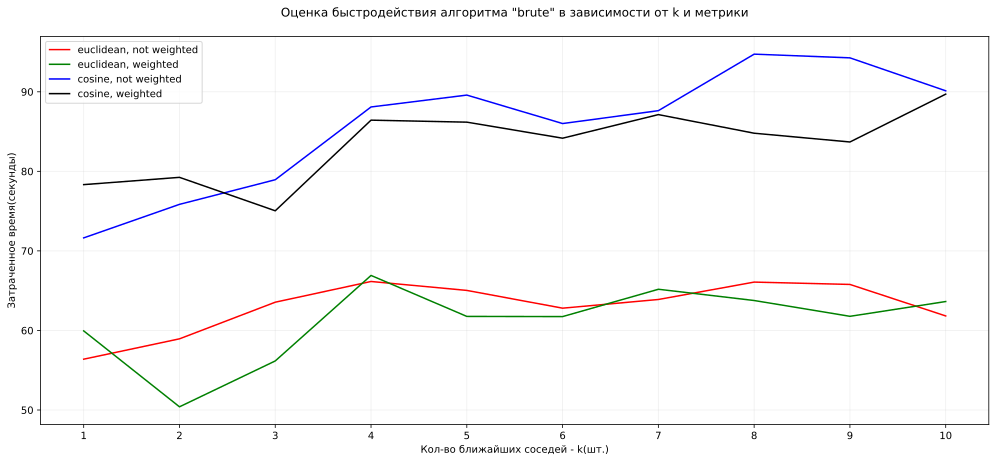

In [32]:
plt.figure(figsize=(17, 7))
plt.title('Оценка быстродействия алгоритма "brute" в зависимости от k и метрики', pad=20)
plt.xlabel('Кол-во ближайших соседей - k(шт.)')
plt.ylabel('Затраченное время(секунды)')

plt.plot(k_list, time_euclid_notweight, 'r', label='euclidean, not weighted')
plt.plot(k_list, time_euclid_weight, 'g', label='euclidean, weighted')
plt.plot(k_list, time_cosine_notweight, 'b', label='cosine, not weighted')
plt.plot(k_list, time_cosine_weight, 'k', label='cosine, weighted')
plt.legend(loc='best')
plt.xticks(np.arange(1, 11, step=1))
plt.grid(linestyle="-", alpha=.2)
plt.show()

Из оценки точности в зависимости от k заметим, что наилучшее accuracy получаем при k=3 и k=4:

In [45]:
print('Разница во времени между невзвешнными евклидовым и косинусным расстояних при k=3: ', abs(time_euclid_notweight[2] - time_cosine_notweight[2]), ' (сек) - быстрее евклидово')
print('Разница во времени между взвешнными евклидовым и косинусным расстояних при k=3: ', abs(time_euclid_weight[2] - time_cosine_weight[2]), ' (сек) - быстрее евклидово')
print()
print('Разница во времени между невзвешнными евклидовым и косинусным расстояних при k=4: ', abs(time_euclid_notweight[3] - time_cosine_notweight[3]), ' (сек) - быстрее евклидово')
print('Разница во времени между взвешнными евклидовым и косинусным расстояних при k=4: ', abs(time_euclid_weight[3] - time_cosine_weight[3]), ' (сек) - быстрее евклидово')

Разница во времени между невзвешнными евклидовым и косинусным расстояних при k=3:  15.394928216934204  (сек) - быстрее евклидово
Разница во времени между взвешнными евклидовым и косинусным расстояних при k=3:  18.872220993041992  (сек) - быстрее евклидово

Разница во времени между невзвешнными евклидовым и косинусным расстояних при k=4:  21.93725895881653  (сек) - быстрее евклидово
Разница во времени между взвешнными евклидовым и косинусным расстояних при k=4:  19.52076005935669  (сек) - быстрее евклидово


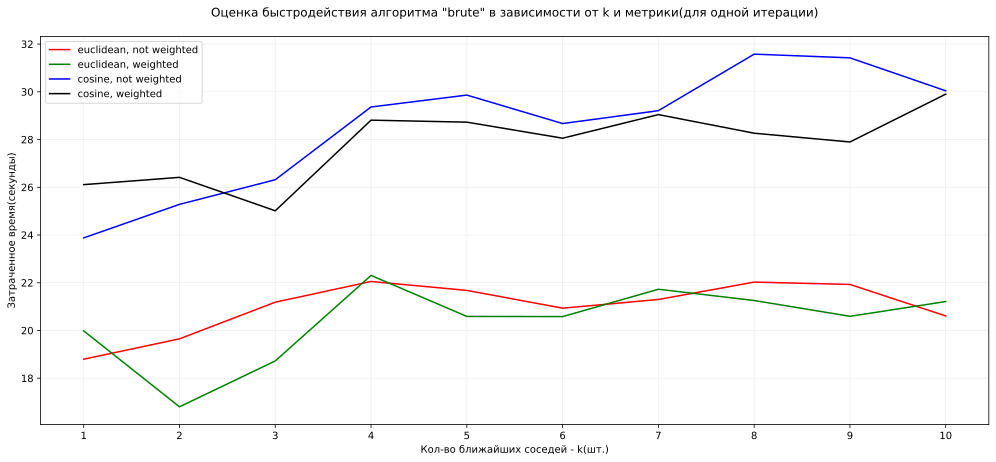

In [47]:
plt.figure(figsize=(17, 7))
plt.title('Оценка быстродействия алгоритма "brute" в зависимости от k и метрики(для одной итерации)', pad=20)
plt.xlabel('Кол-во ближайших соседей - k(шт.)')
plt.ylabel('Затраченное время(секунды)')

plt.plot(k_list, np.divide(time_euclid_notweight, 3), 'r', label='euclidean, not weighted')
plt.plot(k_list, np.divide(time_euclid_weight,3), 'g', label='euclidean, weighted')
plt.plot(k_list, np.divide(time_cosine_notweight, 3), 'b', label='cosine, not weighted')
plt.plot(k_list, np.divide(time_cosine_weight, 3), 'k', label='cosine, weighted')
plt.legend(loc='best')
plt.xticks(np.arange(1, 11, step=1))
plt.grid(linestyle="-", alpha=.2)
plt.show()

#### Оценка точности

In [52]:
cross_val_euclid_notweight = knn_cross_val_score(X_train, y_train, k_list, 'accuracy', cv, strategy='brute', metric='euclidean', weights=False)

In [53]:
cross_val_euclid_weight = knn_cross_val_score(X_train, y_train, k_list, 'accuracy', cv, strategy='brute', metric='euclidean', weights=True)

In [54]:
cross_val_cosine_notweight = knn_cross_val_score(X_train, y_train, k_list, 'accuracy', cv, strategy='brute', metric='cosine', weights=False)

In [55]:
cross_val_cosine_weight = knn_cross_val_score(X_train, y_train, k_list, 'accuracy', cv, strategy='brute', metric='cosine', weights=True)

Евклидова метрика, невзвешенный алгоритм:

In [56]:
cross_val_euclid_notweight

{1: array([0.96895, 0.96675, 0.9667 ]),
 2: array([0.9603 , 0.95995, 0.96125]),
 3: array([0.96955, 0.96825, 0.96715]),
 4: array([0.96705, 0.9667 , 0.9671 ]),
 5: array([0.9681, 0.9673, 0.9672]),
 6: array([0.96555, 0.96495, 0.9657 ]),
 7: array([0.9652, 0.965 , 0.9656]),
 8: array([0.96415, 0.9639 , 0.96525]),
 9: array([0.9637 , 0.9632 , 0.96455]),
 10: array([0.96245, 0.9622 , 0.9637 ])}

Евклидова метрика, взвешенный алгоритм:

In [57]:
cross_val_euclid_weight

{1: array([0.96895, 0.96675, 0.9667 ]),
 2: array([0.96895, 0.96675, 0.9667 ]),
 3: array([0.97075, 0.9691 , 0.96825]),
 4: array([0.9713, 0.9698, 0.9701]),
 5: array([0.96925, 0.96825, 0.96875]),
 6: array([0.9704 , 0.96845, 0.96945]),
 7: array([0.96735, 0.96595, 0.967  ]),
 8: array([0.9676 , 0.96665, 0.9678 ]),
 9: array([0.9651, 0.9643, 0.9657]),
 10: array([0.9647 , 0.96465, 0.9657 ])}

Косинусная метрика, невзвешенный алгоритм:

In [58]:
cross_val_cosine_notweight

{1: array([0.9733 , 0.9708 , 0.97045]),
 2: array([0.96895, 0.9664 , 0.96775]),
 3: array([0.97365, 0.97155, 0.9709 ]),
 4: array([0.9725 , 0.97095, 0.9722 ]),
 5: array([0.97275, 0.97015, 0.9716 ]),
 6: array([0.97195, 0.9697 , 0.97215]),
 7: array([0.97125, 0.96815, 0.97075]),
 8: array([0.97125, 0.96835, 0.97155]),
 9: array([0.97005, 0.967  , 0.9707 ]),
 10: array([0.96935, 0.96615, 0.9707 ])}

Косинусная метрика, взвешенный алгоритм:

In [59]:
cross_val_cosine_weight

{1: array([0.9733 , 0.9708 , 0.97045]),
 2: array([0.9733 , 0.9708 , 0.97045]),
 3: array([0.97495, 0.9725 , 0.97175]),
 4: array([0.97545, 0.9732 , 0.97365]),
 5: array([0.974  , 0.97095, 0.973  ]),
 6: array([0.97465, 0.9714 , 0.97305]),
 7: array([0.9726 , 0.9693 , 0.97195]),
 8: array([0.97295, 0.97045, 0.9722 ]),
 9: array([0.97165, 0.96865, 0.97145]),
 10: array([0.97145, 0.96855, 0.9714 ])}

Усредняем accuracy по каждой метрике для каждого k:

In [60]:
cross_val_euclid_notweight_mean = []
cross_val_euclid_weight_mean = []
cross_val_cosine_notweight_mean = []
cross_val_cosine_weight_mean = []

In [61]:
for k_value in k_list:
    cross_val_euclid_notweight_mean.append(np.mean(cross_val_euclid_notweight[k_value]))
    cross_val_euclid_weight_mean.append(np.mean(cross_val_euclid_weight[k_value]))
    cross_val_cosine_notweight_mean.append(np.mean(cross_val_cosine_notweight[k_value]))
    cross_val_cosine_weight_mean.append(np.mean(cross_val_cosine_weight[k_value]))

In [62]:
print('Усредненные значения accuracy для невзвешеннго алгоритма, евклидова метрика:')
print(cross_val_euclid_notweight_mean)
print()
print('Усредненные значения accuracy для взвешеннго алгоритма, евклидова метрика:')
print(cross_val_euclid_weight_mean)
print()
print('Усредненные значения accuracy для невзвешеннго алгоритма, косинусная метрика:')
print(cross_val_cosine_notweight_mean)
print()
print('Усредненные значения accuracy для взвешеннго алгоритма, косинусная метрика:')
print(cross_val_cosine_weight_mean)

Усредненные значения accuracy для невзвешеннго алгоритма, евклидова метрика:
[0.9674666666666667, 0.9605, 0.9683166666666668, 0.9669499999999999, 0.9675333333333334, 0.9653999999999999, 0.9652666666666666, 0.9644333333333334, 0.9638166666666667, 0.9627833333333333]

Усредненные значения accuracy для взвешеннго алгоритма, евклидова метрика:
[0.9674666666666667, 0.9674666666666667, 0.9693666666666667, 0.9704, 0.96875, 0.9694333333333334, 0.9667666666666667, 0.96735, 0.9650333333333334, 0.9650166666666666]

Усредненные значения accuracy для невзвешеннго алгоритма, косинусная метрика:
[0.9715166666666667, 0.9677000000000001, 0.9720333333333334, 0.9718833333333333, 0.9714999999999999, 0.9712666666666667, 0.97005, 0.9703833333333334, 0.9692500000000001, 0.9687333333333333]

Усредненные значения accuracy для взвешеннго алгоритма, косинусная метрика:
[0.9715166666666667, 0.9715166666666667, 0.9730666666666666, 0.9741, 0.9726499999999999, 0.9730333333333334, 0.9712833333333334, 0.97186666666666

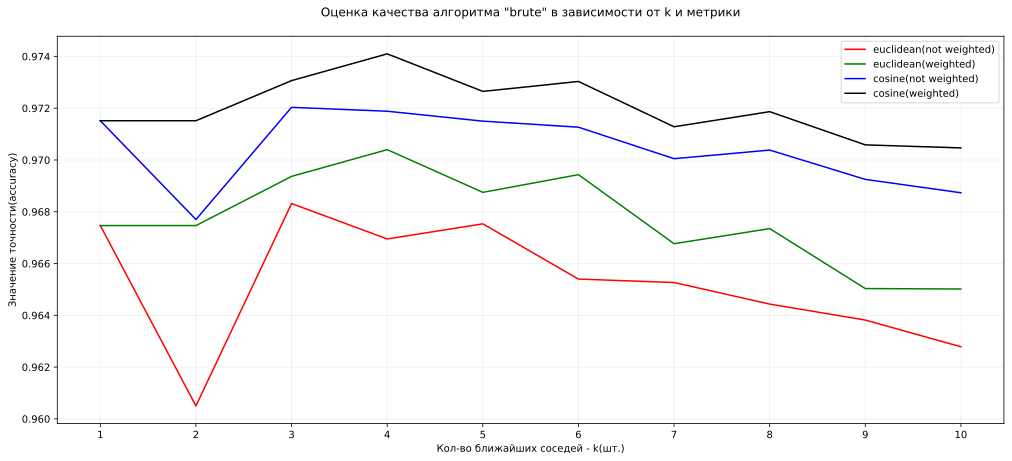

In [63]:
plt.figure(figsize=(17, 7))
plt.title('Оценка качества алгоритма "brute" в зависимости от k и метрики', pad=20)
plt.xlabel('Кол-во ближайших соседей - k(шт.)')
plt.ylabel('Значение точности(accuracy)')

plt.plot(list(range(1, 11)), cross_val_euclid_notweight_mean, 'r', label='euclidean(not weighted)')
plt.plot(list(range(1, 11)), cross_val_euclid_weight_mean, 'g', label='euclidean(weighted)')
plt.plot(list(range(1, 11)), cross_val_cosine_notweight_mean, 'b', label='cosine(not weighted)')
plt.plot(list(range(1, 11)), cross_val_cosine_weight_mean, 'k', label='cosine(weighted)')
plt.legend(loc='best')
plt.xticks(np.arange(1, 11, step=1))
plt.grid(linestyle="-", alpha=.2)
plt.show()

### Вывод

In [77]:
accuracy_mean_differ_weighted = np.mean(np.subtract(cross_val_cosine_weight_mean, cross_val_euclid_weight_mean))
accuracy_mean_differ_notweighted = np.mean(np.subtract(cross_val_cosine_notweight_mean, cross_val_euclid_notweight_mean))

time_mean_differ_weighted = np.mean(np.divide(np.subtract(time_cosine_weight, time_euclid_weight), 3))
time_mean_differ_notweighted = np.mean(np.divide(np.subtract(time_cosine_notweight, time_euclid_notweight), 3))

In [78]:
print('Средняя разница качества косинусной и евклидовой метрик при взвешенном алгоритме: ', accuracy_mean_differ_weighted)
print('Средняя разница качества косинусной и евклидовой метрик при невзвешенном алгоритме: ', accuracy_mean_differ_notweighted)

print('Средняя разница времени работы косинусной и евклидовой метрик при взвешенном алгоритме: ', time_mean_differ_weighted)
print('Средняя разница времени работы косинусной и евклидовой метрик при невзвешенном алгоритме: ', time_mean_differ_notweighted)

Средняя разница качества косинусной и евклидовой метрик при взвешенном алгоритме:  0.004303333333333314
Средняя разница качества косинусной и евклидовой метрик при невзвешенном алгоритме:  0.005185000000000028
Средняя разница времени работы косинусной и евклидовой метрик при взвешенном алгоритме:  7.447810300191245
Средняя разница времени работы косинусной и евклидовой метрик при невзвешенном алгоритме:  7.547190340360006


Заметим что лучшее качество достигалось при k=3 для невзвешенных алгоритмов на косинусной и евклидовой метриках, и при k=4 для взвешенных алгоритмов на косинусной и евклидовой метриках.


а) Сравнив косинусную и евклидову метрики, получаем, что косинусная метрика дает прирост качества: в среднем 0.004 при взвешенном алгоритме, 0.005 при невзвешенном
Но в моем эксперименте косинусная метрика работает дольше евклидовой в среднем на 7.44 (сек.) при взвешенном алгоритме, 7.54 (сек.) при невзвешенном.

б) Видим из графика, что при k=2 невзвешенные алгоритмы сильно теряют в качестве. При k=3 и k=4 достигаются лучшие значения, далее качество медленно убывает с ростом количества соседей(k).

## Эксперимент 3 (продолжение)

В предыдущем эксперименте мы уже проводили анализ взвешенных/невзвешенных алгоритмов при использовании каждой из метрик.

Косинусная метрика показала более высокое качество, поэтому в данном эксперименте подробнее рассмотрем алгоритм с применением именно этой метрики.

Оценка проводится по кросс-валидации на 3 фолдах 

(  Результаты вычислений взяты из предыдущего эксперимента  )

### Оценка времени

Время работы невзвешенного алгоритма для каждого k:

In [84]:
time_cosine_notweight

[71.63635563850403,
 75.85025763511658,
 78.94638133049011,
 88.09262824058533,
 89.58589482307434,
 86.00750064849854,
 87.62804436683655,
 94.73041367530823,
 94.26505064964294,
 90.1224958896637]

Время работы взвешенного алгоритма для каждого k:

In [50]:
time_cosine_weight

[78.33083891868591,
 79.24462413787842,
 75.04038906097412,
 86.4345703125,
 86.18216180801392,
 84.16654753684998,
 87.13197708129883,
 84.79157876968384,
 83.6904878616333,
 89.70472359657288]

In [83]:
time_mean_differ= np.mean(np.divide(np.subtract(time_cosine_notweight, time_cosine_weight), 3))
print('Средняя разница времени работы косинусной метрики при взвешенном и невзвешенном алгоритмах: ', time_mean_differ, ' - взвешенный работает быстрее')

Средняя разница времени работы косинусной метрики при взвешенном и невзвешенном алгоритмах:  0.738237460454305  - взвешенный работает быстрее


### Оценка качества

Среднее Качество невзвешенного алгоритма для каждого k:

In [88]:
cross_val_cosine_notweight_mean

[0.9715166666666667,
 0.9677000000000001,
 0.9720333333333334,
 0.9718833333333333,
 0.9714999999999999,
 0.9712666666666667,
 0.97005,
 0.9703833333333334,
 0.9692500000000001,
 0.9687333333333333]

Среднее Качество взвешенного алгоритма для каждого k:

In [89]:
cross_val_cosine_weight_mean

[0.9715166666666667,
 0.9715166666666667,
 0.9730666666666666,
 0.9741,
 0.9726499999999999,
 0.9730333333333334,
 0.9712833333333334,
 0.9718666666666667,
 0.9705833333333334,
 0.9704666666666667]

In [86]:
accuracy_mean_differ = np.mean(np.subtract(cross_val_cosine_weight_mean, cross_val_cosine_notweight_mean))
print('Средняя разница качества косинусной метрики при взвешенном и невзвешенном алгоритмах: ', accuracy_mean_differ, ' - взвешенный дает лучшее качество')

Средняя разница качества косинусной метрики при взвешенном и невзвешенном алгоритмах:  0.0015766666666666485  - взвешенный дает лучшее качество


## Эксперимент 4

Лучший алгоритм: взвешенный brute, косинусое расстояние, k=4 ближайших соседа

In [97]:
best_model = KNNClassifier(k=4, strategy='brute', metric='cosine', weights=True)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test).astype(int)
model_accuracy = np.mean(y_pred == y_test)

In [98]:
print('Точность модели:', model_accuracy)

Точность модели: 0.9752


Точность по кросс-валидации для 3 фолдов для данной конфигурации модели: 0.9741

Лучшее значение точности, которое мне удалось найти, для данного датасета составляет 0.987. Оно достигается при использовании нейронной сети

Также при применении классификатора RandomForest видел значение немного хуже полученного в данном эксперименте: accuracy=0.9705

### Анализ ошибок

Confusion matrix:

In [100]:
print(confusion_matrix(y_test,y_pred))

[[ 977    1    0    0    0    0    1    1    0    0]
 [   0 1129    3    1    0    0    2    0    0    0]
 [   8    0 1009    1    1    0    0    8    5    0]
 [   0    1    3  976    1   12    0    4    9    4]
 [   2    1    0    0  946    0    6    2    0   25]
 [   4    0    0    9    1  863    7    1    4    3]
 [   3    3    0    0    1    3  948    0    0    0]
 [   2   10    4    0    1    0    0  998    0   13]
 [   7    1    2    9    3    3    5    4  936    4]
 [   7    7    2    5    7    3    1    4    3  970]]


In [93]:
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))

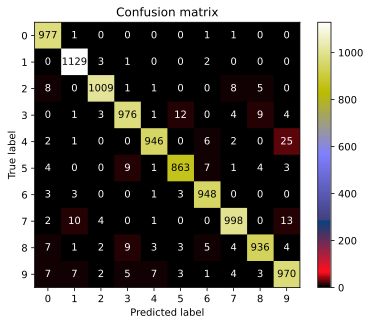

In [101]:
colors = ['gist_stern']
for col in colors:
    cm.plot(cmap=col)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

Анализ наиболее частых ошибок:

In [102]:
errors7_1 = []
errors4_9 = []
for i in range(len(y_pred)):
    if y_pred[i] == 1 and y_test[i] == 7:
        errors7_1.append(i)
    elif y_pred[i] == 9 and y_test[i] == 4:
        errors4_9.append(i)

Ошибка 1

Ответ алгоритма: 1  
Истинное значение: 7

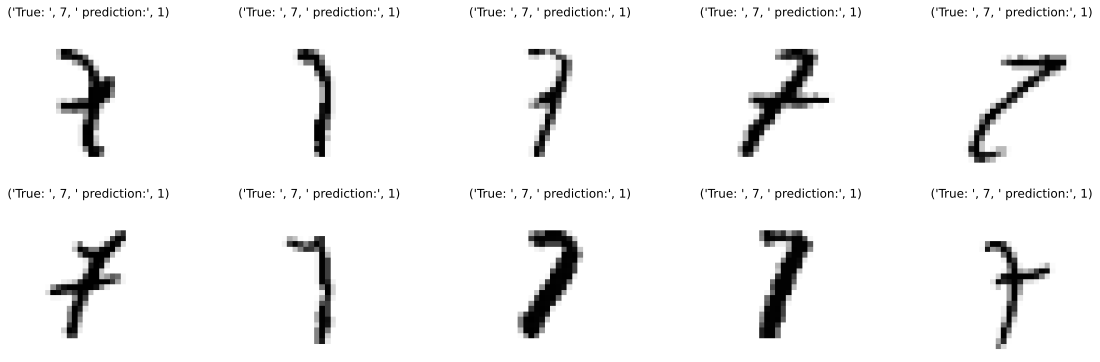

In [113]:
plt.figure(figsize=[20, 6])
j=0
for i in errors7_1:
    plt.subplot(2, 5, j + 1)
    plt.axis('off')
    plt.imshow(X_test[i].reshape(28,28), cmap="Greys")
    plt.title(('True: ', y_test[i], ' prediction:', y_pred[i]))
    j += 1

Считаю, что довольно большое количество ошибок в этом случае (10 ошибок) получается из-за отсутствия "черточки" у семерки, что делает ее похожей на единицу. Также, как мы видим, у цифр, написанных более толстым шрифтом, эта "черточка" почти сливается с самой цифрой, что тоже делает ее близкой к единице.

Ошибка 2

Ответ алгоритма: 9  
Истинное значение: 4

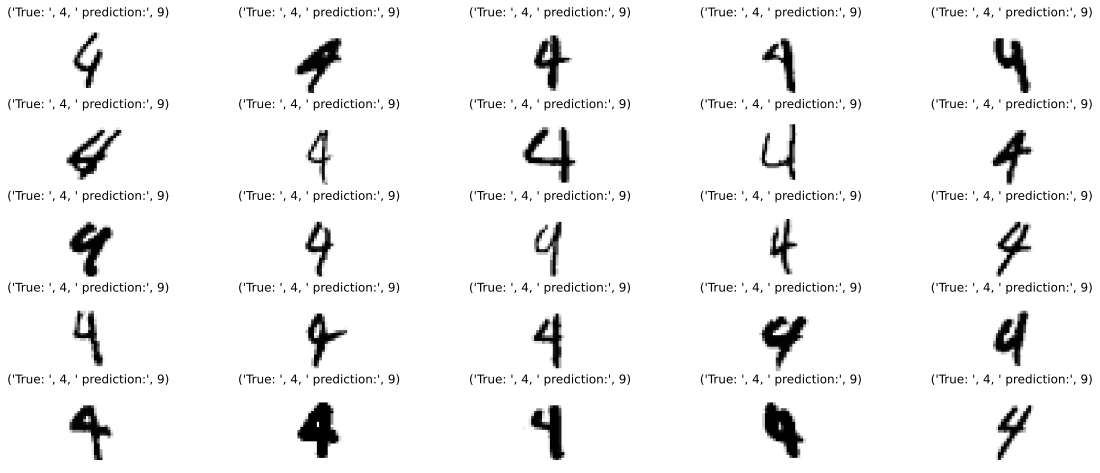

In [112]:
plt.figure(figsize=[20, 8])
j=0
for i in errors4_9:
    plt.subplot(5, 5, j + 1)
    plt.axis('off')
    plt.imshow(X_test[i].reshape(28,28), cmap="Greys")
    plt.title(('True: ', y_test[i], ' prediction:', y_pred[i]))
    j += 1

Думаю, ошибки здесь вызваны тем, что в обучающей выборке часто встречалось написание 9 без закругления внизу(просто вертикальная черта), тогда если у 4 нет четкого разделения ее верхних линий, то она становится похожа на девятку. Также снова видим, что как и в случае с 7 и 1, здесь на ухудшение распознаваемости влияет толщина линий. 

## Эксперимент 5

### Аугментация

#### Повороты

Кросс-валидация для различных преобразований:

In [127]:
rotate_list = [-15, -10, -5, 5, 10, 15]

In [128]:
def current_train_rotation(x_train, y_train, angle):
    X_train_augmented = x_train.copy()
    y_train_augmented = y_train.copy()
    for image, label in zip(X_train_augmented, y_train_augmented):
        rotated_image = scipy.ndimage.rotate(image.reshape(28, 28), angle, reshape=False)
        X_train_augmented = np.vstack([X_train_augmented, rotated_image.reshape(784,)])
        y_train_augmented = np.append(y_train_augmented, label)
    return X_train_augmented, y_train_augmented

In [131]:
mean_accuracy_rotation = {}
cv = kfold(X_train[:10000].shape[0], 3)
for angle in rotate_list:
    mean_accuracy_rotation[angle] = np.empty(len(cv))

for angle in rotate_list:
    j = 0
    for train_i, test_i in cv:
        X_train_curr = X_train[train_i]
        y_train_curr = y_train[train_i]
        X_test_curr = X_train[test_i]
        y_test_curr = y_train[test_i]
        
        X_train_aug, y_train_aug = current_train_rotation(X_train_curr, y_train_curr, angle)
        
        classifier = KNNClassifier(k=4, strategy='brute', metric='cosine', weights=True)
        classifier.fit(X_train_aug, y_train_aug)
        distances, indexes = classifier.find_kneighbors(X_test_curr, return_distance=True)

        train_marks = y_train_aug[indexes]
        predicts = np.empty(indexes.shape[0])
        if classifier.weights:
            weight = 1 / (distances + 1e-5)
            for i in range(predicts.size):
                predicts[i] = np.argmax(np.bincount(train_marks[i], weight[i]))
        else:
            for i in range(predicts.size):
                predicts[i] = np.argmax(np.bincount(train_marks[i]))
        y_pred = predicts
        mean_accuracy_rotation[angle][j] = np.mean(y_pred == y_test_curr)
        j += 1

C:\mmp_prak\pyCharm\KNN\cross_validation.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  folds = np.array(np.array_split(indexes, n_folds))


In [136]:
mean_accuracy_rotation

{-15: array([0.95410918, 0.95589559, 0.94209421]),
 -10: array([0.95320936, 0.95379538, 0.94059406]),
 -5: array([0.95230954, 0.95379538, 0.94419442]),
 5: array([0.95140972, 0.95979598, 0.94239424]),
 10: array([0.95770846, 0.96189619, 0.94329433]),
 15: array([0.95770846, 0.9579958 , 0.94419442])}

#### Сдвиги

In [197]:
shift_list = []
for i in range(-3, 4):
    for j in range(-3, 4):
        shift_list.append((i, j))
print('Кол-во всевозможных смещений:', len(shift_list))

Кол-во всевозможных смещений: 49


In [227]:
def current_train_shift(x_train, y_train, shift):
    X_train_augmented = x_train.copy()
    y_train_augmented = y_train.copy()
    for image, label in zip(X_train_augmented, y_train_augmented):
        shifted_image = scipy.ndimage.shift(image.reshape(28, 28), [shift[0], shift[1]])
        X_train_augmented = np.vstack([X_train_augmented, shifted_image.reshape(784,)])
        y_train_augmented = np.append(y_train_augmented, label)
    return X_train_augmented, y_train_augmented

In [ ]:
mean_accuracy_shifts = {}
cv = kfold(X_train[:5000].shape[0], 3)
for shift in shift_list:
    mean_accuracy_shifts[shift] = np.empty(len(cv))

for shift in shift_list:
    j = 0
    for train_i, test_i in cv:
        X_train_curr = X_train[train_i]
        y_train_curr = y_train[train_i]
        X_test_curr = X_train[test_i]
        y_test_curr = y_train[test_i]
        
        X_train_aug, y_train_aug = current_train_shift(X_train_curr, y_train_curr, shift)
        
        classifier = KNNClassifier(k=4, strategy='brute', metric='cosine', weights=True)
        classifier.fit(X_train_aug, y_train_aug)
        distances, indexes = classifier.find_kneighbors(X_test_curr, return_distance=True)

        train_marks = y_train_aug[indexes]
        predicts = np.empty(indexes.shape[0])
        if classifier.weights:
            weight = 1 / (distances + 1e-5)
            for i in range(predicts.size):
                predicts[i] = np.argmax(np.bincount(train_marks[i], weight[i]))
        else:
            for i in range(predicts.size):
                predicts[i] = np.argmax(np.bincount(train_marks[i]))
        y_pred = predicts
        mean_accuracy_shifts[shift][j] = np.mean(y_pred == y_test_curr)
        j += 1

In [233]:
print(mean_accuracy_shifts)

{(-3, -3): array([0.94061188, 0.94961008, 0.93757503]), (-3, -2): array([0.93641272, 0.94781044, 0.93697479]), (-3, -1): array([0.93521296, 0.94541092, 0.93697479]), (-3, 0): array([0.93641272, 0.94781044, 0.93577431]), (-3, 1): array([0.93821236, 0.95140972, 0.93697479]), (-3, 2): array([0.93941212, 0.95020996, 0.93637455]), (-3, 3): array([0.93941212, 0.95080984, 0.93757503]), (-2, -3): array([0.93881224, 0.9490102 , 0.93757503]), (-2, -2): array([0.93821236, 0.94421116, 0.93637455]), (-2, -1): array([0.9340132 , 0.94361128, 0.93697479]), (-2, 0): array([0.93221356, 0.9490102 , 0.93637455]), (-2, 1): array([0.93881224, 0.95020996, 0.94297719]), (-2, 2): array([0.94061188, 0.94961008, 0.93937575]), (-2, 3): array([0.940012  , 0.95080984, 0.93817527]), (-1, -3): array([0.93941212, 0.95140972, 0.93757503]), (-1, -2): array([0.93821236, 0.94841032, 0.93937575]), (-1, -1): array([0.93641272, 0.95020996, 0.93817527]), (-1, 0): array([0.93041392, 0.94781044, 0.93397359]), (-1, 1): array([0.

#### Дисперсия фильтра Гаусса

In [91]:
disp_gauss = [0.5, 1, 1.5]

In [100]:
def current_train_gauss(x_train, y_train, disp):
    X_train_augmented = x_train.copy()
    y_train_augmented = y_train.copy()
    for image, label in zip(X_train_augmented, y_train_augmented):
        gaussed = cv2.GaussianBlur(image.reshape(28, 28), (3,3), disp)
        X_train_augmented = np.vstack([X_train_augmented, gaussed.reshape(784,)])
        y_train_augmented = np.append(y_train_augmented, label)
    return X_train_augmented, y_train_augmented

In [ ]:
mean_accuracy_gauss = {}
cv = kfold(X_train.shape[0], 3)
for disp in disp_gauss:
    mean_accuracy_gauss[disp] = np.empty(len(cv))

for disp in disp_gauss:
    j = 0
    for train_i, test_i in cv:
        X_train_curr = X_train[train_i]
        y_train_curr = y_train[train_i]
        X_test_curr = X_train[test_i]
        y_test_curr = y_train[test_i]
        
        X_train_aug, y_train_aug = current_train_gauss(X_train_curr, y_train_curr, disp)
        
        classifier = KNNClassifier(k=4, strategy='brute', metric='cosine', weights=True)
        classifier.fit(X_train_aug, y_train_aug)
        distances, indexes = classifier.find_kneighbors(X_test_curr, return_distance=True)

        train_marks = y_train_aug[indexes]
        predicts = np.empty(indexes.shape[0])
        if classifier.weights:
            weight = 1 / (distances + 1e-5)
            for i in range(predicts.size):
                predicts[i] = np.argmax(np.bincount(train_marks[i], weight[i]))
        else:
            for i in range(predicts.size):
                predicts[i] = np.argmax(np.bincount(train_marks[i]))
        y_pred = predicts
        mean_accuracy_gauss[disp][j] = np.mean(y_pred == y_test_curr)
        j += 1

In [181]:
mean_accuracy_gauss

{0.5: array([0.9771 , 0.97555, 0.9753 ]),
 1: array([0.9771 , 0.97555, 0.9753 ]),
 1.5: array([0.9771 , 0.97555, 0.9753 ])}

#### Морфологические операции

Ядро:

In [103]:
kernel = np.ones((2,2),np.uint8)

##### Эрозия

In [104]:
def current_train_erosion(x_train, y_train, kernel):
    X_train_augmented = x_train.copy()
    y_train_augmented = y_train.copy()
    for image, label in zip(X_train_augmented, y_train_augmented):
        erosion = cv2.erode(image.reshape(28, 28), kernel, iterations = 1)
        X_train_augmented = np.vstack([X_train_augmented, erosion.reshape(784,)])
        y_train_augmented = np.append(y_train_augmented, label)
    return X_train_augmented, y_train_augmented

In [106]:
mean_accuracy_erosion = {}
cv = kfold(X_train.shape[0], 3)
mean_accuracy_erosion['erosion'] = np.empty(len(cv))

j=0
for train_i, test_i in cv:
    X_train_curr = X_train[train_i]
    y_train_curr = y_train[train_i]
    X_test_curr = X_train[test_i]
    y_test_curr = y_train[test_i]
        
    print('start erosion')
    X_train_aug, y_train_aug = current_train_erosion(X_train_curr, y_train_curr, kernel)
    print('finish erosion')
        
    classifier = KNNClassifier(k=4, strategy='brute', metric='cosine', weights=True)
    classifier.fit(X_train_aug, y_train_aug)
    distances, indexes = classifier.find_kneighbors(X_test_curr, return_distance=True)

    train_marks = y_train_aug[indexes]
    predicts = np.empty(indexes.shape[0])
    if classifier.weights:
        weight = 1 / (distances + 1e-5)
        for i in range(predicts.size):
            predicts[i] = np.argmax(np.bincount(train_marks[i], weight[i]))
    else:
        for i in range(predicts.size):
            predicts[i] = np.argmax(np.bincount(train_marks[i]))
    y_pred = predicts
    mean_accuracy_erosion['erosion'][j] = np.mean(y_pred == y_test_curr)
    j += 1

C:\mmp_prak\pyCharm\KNN\cross_validation.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  folds = np.array(np.array_split(indexes, n_folds))


start erosion
finish erosion
start erosion
finish erosion
start erosion
finish erosion


In [107]:
mean_accuracy_erosion

{'erosion': array([0.95530894, 0.95379538, 0.94029403])}

##### Дилатация

In [120]:
def current_train_dilation(x_train, y_train, kernel):
    X_train_augmented = x_train.copy()
    y_train_augmented = y_train.copy()
    for image, label in zip(X_train_augmented, y_train_augmented):
        dilation = cv2.dilate(image.reshape(28, 28), kernel, iterations = 1)
        X_train_augmented = np.vstack([X_train_augmented, dilation.reshape(784,)])
        y_train_augmented = np.append(y_train_augmented, label)
    return X_train_augmented, y_train_augmented

In [ ]:
mean_accuracy_dilation = {}
cv = kfold(X_train.shape[0], 3)
mean_accuracy_dilation['dilation'] = np.empty(len(cv))

j = 0
for train_i, test_i in cv:
    X_train_curr = X_train[train_i]
    ytrain_curr = y_train[train_i]
    X_test_curr = X_train[test_i]
    y_test_curr = y_train[test_i]
        
    X_train_aug, y_train_aug = current_train_dilation(X_train_curr, y_train_curr, kernel)
        
    classifier = KNNClassifier(k=4, strategy='brute', metric='cosine', weights=True)
    classifier.fit(X_train_aug, y_train_aug)
    distances, indexes = classifier.find_kneighbors(X_test_curr, return_distance=True)

    train_marks = y_train_aug[indexes]
    predicts = np.empty(indexes.shape[0])
    if classifier.weights:
        weight = 1 / (distances + 1e-5)
        for i in range(predicts.size):
            predicts[i] = np.argmax(np.bincount(train_marks[i], weight[i]))
    else:
        for i in range(predicts.size):
            predicts[i] = np.argmax(np.bincount(train_marks[i]))
    y_pred = predicts
    mean_accuracy_dilation['dilation'][j] = np.mean(y_pred == y_test_curr)
    j += 1

In [122]:
mean_accuracy_dilation

{'dilation': array([0.95890822, 0.95469547, 0.94359436])}

##### Открытие

In [177]:
def current_train_opening(x_train, y_train, kernel):
    X_train_augmented = x_train.copy()
    y_train_augmented = y_train.copy()
    for image, label in zip(X_train_augmented, y_train_augmented):
        opening = cv2.morphologyEx(image.reshape(28, 28), cv2.MORPH_OPEN, kernel)
        X_train_augmented = np.vstack([X_train_augmented, opening.reshape(784,)])
        y_train_augmented = np.append(y_train_augmented, label)
    return X_train_augmented, y_train_augmented

In [ ]:
mean_accuracy_opening = {}
cv = kfold(X_train.shape[0], 3)
mean_accuracy_opening['opening'] = np.empty(len(cv))

j = 0
for train_i, test_i in cv:
    X_train_curr = X_train[train_i]
    y_train_curr = y_train[train_i]
    X_test_curr = X_train[test_i]
    y_test_curr = y_train[test_i]
        
    X_train_aug, y_train_aug = current_train_opening(X_train_curr, y_train_curr, kernel)
        
    classifier = KNNClassifier(k=4, strategy='brute', metric='cosine', weights=True)
    classifier.fit(X_train_aug, y_train_aug)
    distances, indexes = classifier.find_kneighbors(X_test_curr, return_distance=True)

    train_marks = y_train_aug[indexes]
    predicts = np.empty(indexes.shape[0])
    if classifier.weights:
        weight = 1 / (distances + 1e-5)
        for i in range(predicts.size):
            predicts[i] = np.argmax(np.bincount(train_marks[i], weight[i]))
    else:
        for i in range(predicts.size):
            predicts[i] = np.argmax(np.bincount(train_marks[i]))
    y_pred = predicts
    mean_accuracy_opening['opening'][j] = np.mean(y_pred == y_test_curr)
    j += 1

In [179]:
mean_accuracy_opening

{'opening': array([0.9771 , 0.97555, 0.9753 ])}

##### Закрытие

In [173]:
def current_train_closing(x_train, y_train, kernel):
    X_train_augmented = x_train.copy()
    y_train_augmented = y_train.copy()
    for image, label in zip(X_train_augmented, y_train_augmented):
        closing = cv2.morphologyEx(image.reshape(28, 28), cv2.MORPH_CLOSE, kernel)
        X_train_augmented = np.vstack([X_train_augmented, closing.reshape(784,)])
        y_train_augmented = np.append(y_train_augmented, label)
    return X_train_augmented, y_train_augmented

In [175]:
mean_accuracy_closing = {}
cv = kfold(X_train.shape[0], 3)
mean_accuracy_closing['closing'] = np.empty(len(cv))

j = 0
for train_i, test_i in cv:
    X_train_curr = X_train[train_i]
    y_train_curr = y_train[train_i]
    X_test_curr = X_train[test_i]
    y_test_curr = y_train[test_i]
        
    X_train_aug, y_train_aug = current_train_closing(X_train_curr, y_train_curr, kernel)
        
    classifier = KNNClassifier(k=4, strategy='brute', metric='cosine', weights=True)
    classifier.fit(X_train_aug, y_train_aug)
    distances, indexes = classifier.find_kneighbors(X_test_curr, return_distance=True)

    train_marks = y_train_aug[indexes]
    predicts = np.empty(indexes.shape[0])
    if classifier.weights:
        weight = 1 / (distances + 1e-5)
        for i in range(predicts.size):
            predicts[i] = np.argmax(np.bincount(train_marks[i], weight[i]))
    else:
        for i in range(predicts.size):
            predicts[i] = np.argmax(np.bincount(train_marks[i]))
    y_pred = predicts
    mean_accuracy_closing['closing'][j] = np.mean(y_pred == y_test_curr)
    j += 1

In [176]:
mean_accuracy_closing

{'closing': array([0.97705, 0.97555, 0.9753 ])}

### Вывод

Усредняем значение точности для каждого преобразования по фолдам:

In [182]:
mean_accuracy_rotation_mean = {}
for rotate in rotate_list:
    mean_accuracy_rotation_mean[rotate] = 0
for rotate in rotate_list:
    mean_accuracy_rotation_mean[rotate] = np.mean(mean_accuracy_rotation[rotate])

In [234]:
mean_accuracy_shifts_mean = {}
for shift in shift_list:
    mean_accuracy_shifts_mean[shift] = 0
for shift in shift_list:
    mean_accuracy_shifts_mean[shift] = np.mean(mean_accuracy_shifts[shift])

In [184]:
mean_accuracy_gauss_mean = {}
for disp in disp_gauss:
    mean_accuracy_gauss_mean[disp] = 0
for disp in disp_gauss:
    mean_accuracy_gauss_mean[disp] = np.mean(mean_accuracy_gauss[disp])

In [185]:
mean_accuracy_erosion_mean = np.mean(mean_accuracy_erosion['erosion'])
mean_accuracy_dilation_mean = np.mean(mean_accuracy_dilation['dilation'])
mean_accuracy_opening_mean = np.mean(mean_accuracy_opening['opening'])
mean_accuracy_closing_mean = np.mean(mean_accuracy_closing['closing'])

In [240]:
from operator import invert


sorted_accuracy = []
for shift in shift_list:
    sorted_accuracy.append(mean_accuracy_shifts_mean[shift])
sorted_accuracy.sort(reverse=True)

In [241]:
sorted_accuracy

[0.9459997556311067,
 0.9459990354870204,
 0.9447993954630443,
 0.9439997954790794,
 0.9431992353029993,
 0.943199115278985,
 0.9429990352469723,
 0.9427989552149594,
 0.9427989552149594,
 0.9425993552790041,
 0.942598995206961,
 0.942598995206961,
 0.9424001154150923,
 0.9423987951509338,
 0.9421989551669497,
 0.941999475255009,
 0.941998875134937,
 0.9417991551749675,
 0.9415993151909835,
 0.9409995551910026,
 0.9403993150949642,
 0.9399991550309386,
 0.9395993550389562,
 0.9391995550469737,
 0.9391994350229593,
 0.9381997550069817,
 0.9373993148549161,
 0.9348003148469947,
 0.8759777741813669,
 0.872983762205319,
 0.8729777681873491,
 0.8719857582133032,
 0.871979764195333,
 0.871976767186348,
 0.8709817602033171,
 0.8709787631943321,
 0.8709727691763619,
 0.8709697721673771,
 0.8699867532202861,
 0.8699747651843461,
 0.869968771166376,
 0.8689797582013151,
 0.868979758201315,
 0.867981754209299,
 0.867978757200314,
 0.8659827492162822,
 0.8659707611803421,
 0.8609807412202621,
 0.7

Вывод всех средних значений accuracy:

In [236]:
print('rotation: ', mean_accuracy_rotation_mean)
print()
print('shifts: ', mean_accuracy_shifts_mean)
print()
print('gauss: ', mean_accuracy_gauss_mean)

print('erosion: ', mean_accuracy_erosion_mean)
print('dilation: ', mean_accuracy_dilation_mean)
print('opening: ', mean_accuracy_opening_mean)
print('closing: ', mean_accuracy_closing_mean)

rotation:  {-15: 0.9506996590480883, -10: 0.9491995990240896, -5: 0.9500997790240931, 5: 0.951199979026097, 10: 0.9542996591200813, 15: 0.9532995591100802}

shifts:  {(-3, -3): 0.942598995206961, (-3, -2): 0.9403993150949642, (-3, -1): 0.9391995550469737, (-3, 0): 0.9399991550309386, (-3, 1): 0.9421989551669497, (-3, 2): 0.941998875134937, (-3, 3): 0.942598995206961, (-2, -3): 0.9417991551749675, (-2, -2): 0.9395993550389562, (-2, -1): 0.9381997550069817, (-2, 0): 0.9391994350229593, (-2, 1): 0.9439997954790794, (-2, 2): 0.9431992353029993, (-2, 3): 0.9429990352469723, (-1, -3): 0.9427989552149594, (-1, -2): 0.941999475255009, (-1, -1): 0.9415993151909835, (-1, 0): 0.9373993148549161, (-1, 1): 0.9424001154150923, (-1, 2): 0.9425993552790041, (-1, 3): 0.9427989552149594, (0, -3): 0.943199115278985, (0, -2): 0.9459990354870204, (0, -1): 0.9459997556311067, (0, 0): 0.9348003148469947, (0, 1): 0.9409995551910026, (0, 2): 0.9447993954630443, (0, 3): 0.9423987951509338, (1, -3): 0.8699867532

Видим, что из поворотов самым действенным оказался: 10

Видим, что из смещений самым действенным оказалось: ???

Видим, что из фильтра Гаусса самой действенной оказалсь дисперсия: 1.5


Видим, что морфологических операций самой действенной оказалась: откытие, закрытие

Тестирование модели:

In [ ]:
best_model_aug = KNNClassifier(k=4, strategy='brute', metric='cosine', weights=True)
kernel = np.ones((2,2),np.uint8)

X_train_aug, y_train_aug = current_train_opening(X_train, y_train, kernel)

In [203]:
best_model_aug.fit(X_train_aug, y_train_aug)
y_pred = best_model_aug.predict(X_test).astype(int)
model_accuracy = np.mean(y_pred == y_test)

In [204]:
print('Точность модели:', model_accuracy)

Точность модели: 0.9732


In [205]:
print(confusion_matrix(y_test,y_pred))

[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1130    2    0    0    0    3    0    0    0]
 [   7    1 1007    2    1    0    2    7    5    0]
 [   1    0    2  979    0   11    0    6    9    2]
 [   1    2    0    0  948    0    4    2    1   24]
 [   8    0    0   12    1  856    7    2    2    4]
 [   7    2    0    0    1    1  947    0    0    0]
 [   3   14    6    0    1    0    0  990    0   14]
 [   8    1    3    7    3    4    7    2  935    4]
 [   5    8    1   11    6    2    1   10    3  962]]


In [206]:
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))

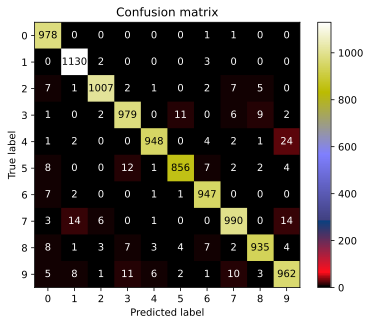

In [207]:
colors = ['gist_stern']
for col in colors:
    cm.plot(cmap=col)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

Видим, что в некоторых случаях ошибок стало меньше (ошибки для 4и9, 7и1, 5и3), но в некоторых наоборот увеличилось(ошибки 9и7, 3и5).

In [ ]:
X_train_aug, y_train_aug = current_train_closing(X_train_aug, y_train_aug, kernel)

In [214]:
best_model_aug.fit(X_train_aug, y_train_aug)
y_pred = best_model_aug.predict(X_test).astype(int)
model_accuracy = np.mean(y_pred == y_test)

In [215]:
print('Точность модели:', model_accuracy)

Точность модели: 0.9732


In [216]:
print(confusion_matrix(y_test,y_pred))

[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1130    2    0    0    0    3    0    0    0]
 [   7    1 1007    2    1    0    2    7    5    0]
 [   1    0    2  979    0   11    0    6    9    2]
 [   1    2    0    0  948    0    4    2    1   24]
 [   8    0    0   12    1  856    7    2    2    4]
 [   7    2    0    0    1    1  947    0    0    0]
 [   3   14    6    0    1    0    0  990    0   14]
 [   8    1    3    7    3    4    7    2  935    4]
 [   5    8    1   11    6    2    1   10    3  962]]


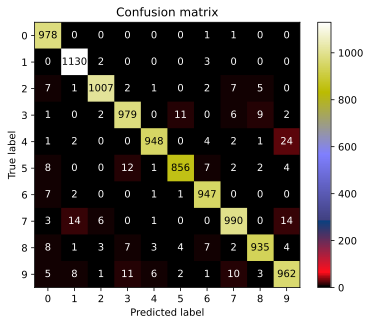

In [217]:
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))

colors = ['gist_stern']
for col in colors:
    cm.plot(cmap=col)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

In [ ]:
X_train_aug, y_train_aug = current_train_gauss(X_train, y_train, 1.5)

In [221]:
best_model_aug.fit(X_train_aug, y_train_aug)
y_pred = best_model_aug.predict(X_test).astype(int)
model_accuracy = np.mean(y_pred == y_test)

In [ ]:
print('Точность модели:', model_accuracy)

## Эксперимент 6

In [242]:
best_model_test_aug = KNNClassifier(k=4, strategy='brute', metric='cosine', weights=True)
kernel = np.ones((2,2),np.uint8)

best_model_aug.fit(X_train, y_train)

In [243]:
X_test_aug, y_test_aug = current_train_gauss(X_test, y_test, 1.5)

y_pred = best_model_aug.predict(X_test_aug).astype(int)
model_accuracy = np.mean(y_pred == y_test_aug)

In [244]:
print('Точность модели:', model_accuracy)

Точность модели: 0.9665


In [246]:
print(confusion_matrix(y_test_aug,y_pred))

[[170   0   0   0   0   0   0   0   0   0]
 [  0 250   2   0   0   0   0   0   0   0]
 [  2   0 223   0   0   0   1   4   2   0]
 [  0   0   0 206   0   3   0   3   0   2]
 [  0   0   0   0 202   0   3   0   0  15]
 [  0   0   0   0   2 171   1   0   0   0]
 [  3   0   0   0   1   0 170   0   0   0]
 [  0   2   1   0   2   0   0 193   0   0]
 [  2   1   2   3   0   0   0   1 167   2]
 [  0   2   0   0   0   0   0   0   5 181]]


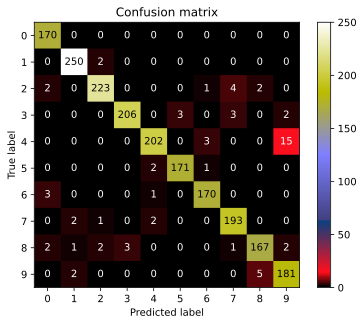

In [249]:
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_aug,y_pred))

colors = ['gist_stern']
for col in colors:
    cm.plot(cmap=col)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

In [251]:
X_test_aug, y_test_aug = current_train_opening(X_test, y_test, kernel)

y_pred = best_model_aug.predict(X_test_aug).astype(int)
model_accuracy = np.mean(y_pred == y_test_aug)

In [255]:
print('Точность модели:', model_accuracy)

Точность модели: 0.915


In [256]:
print(confusion_matrix(y_test_aug, y_pred))

[[169   0   0   0   0   0   1   0   0   0]
 [  0 215   1   1   4   0   0  31   0   0]
 [  9   1 201   0   0   0   0  14   6   1]
 [  0   0   1 197   0   3   0   2   8   3]
 [  1   1   0   0 203   0   4   0   0  11]
 [  0   1   0   8   1 160   1   0   2   1]
 [  3   1   0   1   0   0 167   0   2   0]
 [  0   1   0   0   2   1   0 191   0   3]
 [  2   1   2   2   3   3   0   2 151  12]
 [  0   1   0   0   3   0   0   4   4 176]]


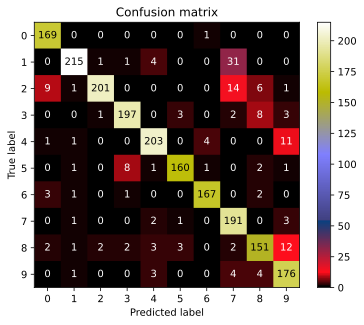

In [257]:
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_aug, y_pred))

colors = ['gist_stern']
for col in colors:
    cm.plot(cmap=col)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()